In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('HR_Analytics.csv')

In [3]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


The dataset contains multiple columns that could be factors in an employee's decision to leave the company, including age, business travel frequency, daily rate, department, distance from home, education, and more. The Attrition column, which indicates whether an employee has left the company (Yes) or not (No), will be our target variable for prediction.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Basic statistics for numerical features
numerical_stats = df.describe()

# Overview of categorical variables
categorical_overview = df.describe(include=['O'])


In [6]:
missing_values

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [7]:
numerical_stats

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
categorical_overview

,EmpID,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,Over18,OverTime
count,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
unique,1470,5,2,4,3,6,2,9,3,4,1,2
top,RM1467,26-35,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Upto 5k,Y,No
freq,2,611,1242,1042,967,607,889,329,679,753,1480,1062


The dataset contains 1,480 entries and 38 columns, with no missing values except for YearsWithCurrManager, which has 57 missing values. This comprehensive dataset includes both numerical and categorical variables that describe various aspects of employee demographics, job characteristics, and satisfaction levels

## Key Observations

Numerical Variables: The dataset includes a wide range of numerical variables such as Age, DailyRate, DistanceFromHome, Education, and various performance and satisfaction metrics. The YearsAtCompany variable, for example, ranges from 0 to 40, indicating a broad spectrum of employee tenures within the company.


Categorical Variables: There are several categorical variables, including Attrition (our target variable), BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, SalarySlab, and OverTime. These variables capture different aspects of the employees' work life and personal attributes.


Unique and Frequent Categories: For instance, the most common Department is "Research & Development", the top EducationField is "Life Sciences", and the majority of employees are classified under the "Upto 5k" SalarySlab. Additionally, Attrition shows a split with 1,242 employees not leaving (No) and the remainder leaving (Yes).

## Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

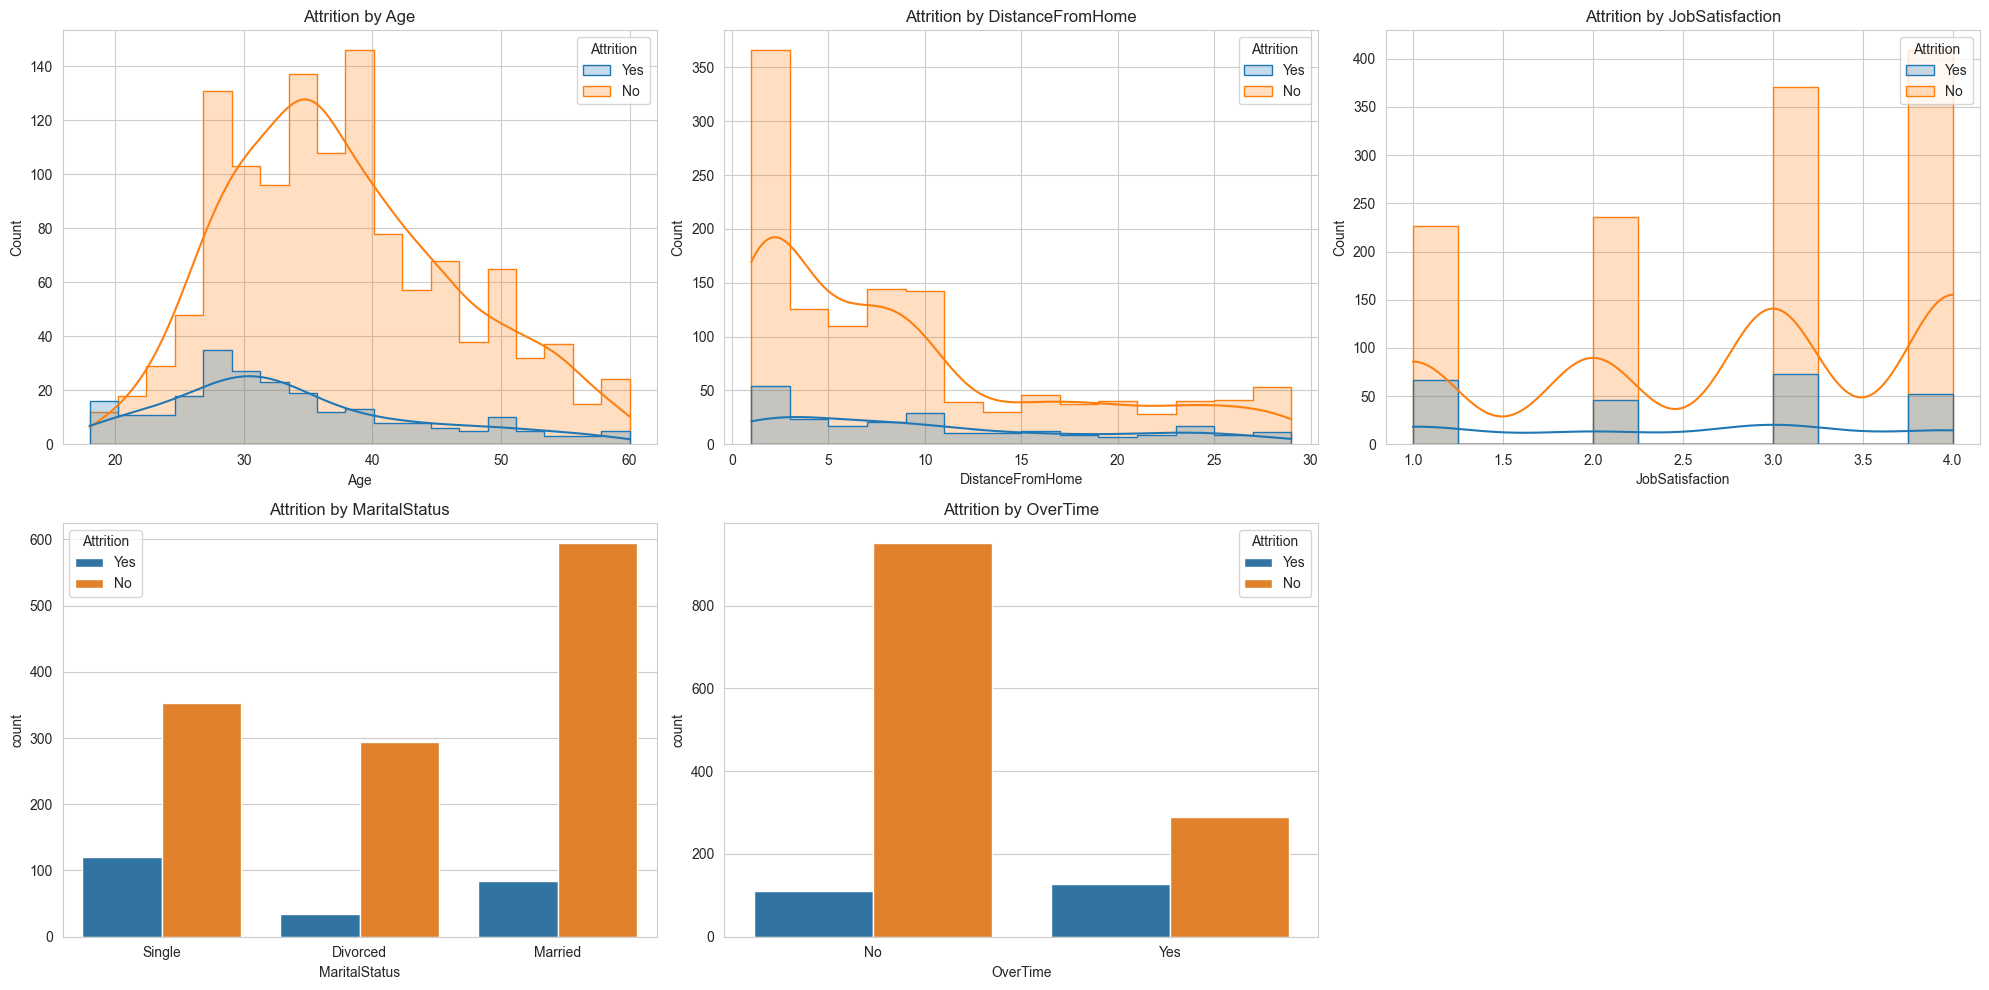

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create a list of variables to explore their relationship with Attrition
variables_to_explore = ['Age', 'DistanceFromHome', 'JobSatisfaction', 'MaritalStatus', 'OverTime']

# Plotting
for i, variable in enumerate(variables_to_explore, 1):
    plt.subplot(2, 3, i)
    if df[variable].dtype == 'O':  # If the variable is categorical
        sns.countplot(x=variable, hue='Attrition', data=df)
    else:  # If the variable is numerical
        sns.histplot(x=variable, hue='Attrition', data=df, kde=True, element='step')
    plt.title(f'Attrition by {variable}')
    plt.tight_layout()

plt.show()

## Key Observations

1. Age: Younger employees seem to leave more frequently than older employees. The attrition rate appears higher among employees in their late teens to early 30s, decreasing as age increases.

2. Distance from Home: Employees living farther from their workplace show a somewhat higher tendency to leave, especially those with a significant commute.

3. Job Satisfaction: Lower levels of job satisfaction are associated with higher attrition rates. Employees with the lowest job satisfaction level show the highest propensity to leave.

4. Marital Status: Single employees tend to leave at a higher rate compared to married or divorced employees.

5. OverTime: Employees who work overtime are more likely to leave compared to those who do not work overtime.


## Machine Learning Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Attrition':  # Exclude target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


In [13]:
# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [17]:
# Defining the feature variables and the target variable
X = df.drop(['EmpID', 'Attrition','YearsWithCurrManager'], axis=1)  # Exclude 'EmpID' as it's just an identifier
y = df['Attrition']

In [18]:
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Instantiate and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

Accuracy: 0.8581081081081081
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       248
           1       0.88      0.15      0.25        48

    accuracy                           0.86       296
   macro avg       0.87      0.57      0.59       296
weighted avg       0.86      0.86      0.81       296



In [21]:
print(f"Accuracy= {accuracy*100}%")

Accuracy= 85.8108108108108%


## Key Takeaways:

1. Precision for Class 0 (No Attrition): 86% means that the model is fairly accurate when predicting employees who will not leave the company.

2. Precision for Class 1 (Attrition): 90% indicates that when the model predicts an employee will leave, it's quite reliable.

3. Recall for Class 0 (No Attrition): 100% demonstrates the model's excellent capability in identifying all actual non-leavers.

4. Recall for Class 1 (Attrition): 19% shows that the model struggles significantly to identify employees who will leave the company. This is reflective of the class imbalance observed in the dataset.

5. The model is highly effective in predicting employees who will not leave (high precision and recall for Class 0). However, its performance in identifying employees at risk of leaving (Class 1) is limited, mainly due to the low recall value.

6. The imbalance in the dataset between employees who leave and those who do not may contribute to the model's difficulty in accurately predicting attrition. Techniques such as oversampling, undersampling, or using more advanced algorithms might improve performance for the minority class.